# Data Cleaning

In [412]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Import Augmented Dickey-Fuller test.
from statsmodels.tsa.stattools import adfuller


from statsmodels.tsa.seasonal import seasonal_decompose

# Import the partial autocorrelation function (PACF) plot.
from statsmodels.graphics.tsaplots import plot_pacf

# Import the autocorrelation function (ACF) plot.
from statsmodels.graphics.tsaplots import plot_acf

In [283]:
## Read the data
df = pd.read_csv('Data_collection//Data/2000-2002.csv1',skiprows=None)

In [284]:
##define the columns
df.columns = ['date', 'B','T[K]','Np','Ur']

In [285]:
df.head(2)

,date,B,T[K],Np,Ur
0,2000-01-01T00:30:00.000Z,7.5,324194.0,2.9,675.0
1,2000-01-01T01:30:00.000Z,7.8,302235.0,2.6,677.0


In [286]:
df.tail(2)

,date,B,T[K],Np,Ur
17542,2001-12-31T22:30:00.000Z,9.2,128564.0,3.5,483.0
17543,2001-12-31T23:30:00.000Z,8.9,111474.0,3.3,471.0


In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    17544 non-null  object 
 1   B       17544 non-null  float64
 2   T[K]    17544 non-null  float64
 3   Np      17544 non-null  float64
 4   Ur      17544 non-null  float64
dtypes: float64(4), object(1)
memory usage: 685.4+ KB


In [288]:
##Convert the date column to a datetime data type
df['date'] = pd.to_datetime(df['date'])

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   date    17544 non-null  datetime64[ns, UTC]
 1   B       17544 non-null  float64            
 2   T[K]    17544 non-null  float64            
 3   Np      17544 non-null  float64            
 4   Ur      17544 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(4)
memory usage: 685.4 KB


In [290]:
df.set_index('date' , inplace = True)

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17544 entries, 2000-01-01 00:30:00+00:00 to 2001-12-31 23:30:00+00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   B       17544 non-null  float64
 1   T[K]    17544 non-null  float64
 2   Np      17544 non-null  float64
 3   Ur      17544 non-null  float64
dtypes: float64(4)
memory usage: 685.3 KB


In [292]:
df.head(5)

,B,T[K],Np,Ur
date,,,,
2000-01-01 00:30:00+00:00,7.5,324194.0,2.9,675.0
2000-01-01 01:30:00+00:00,7.8,302235.0,2.6,677.0
2000-01-01 02:30:00+00:00,7.6,349786.0,2.2,708.0
2000-01-01 03:30:00+00:00,7.4,362297.0,2.1,706.0
2000-01-01 04:30:00+00:00,7.0,429384.0,2.0,721.0


In [293]:
data = df.loc['2000-01':'2000-01']

In [294]:
data.describe()

,B,T[K],Np,Ur
count,744.000000,7.440000e+02,744.000000,744.000000
mean,6.890323,5.585975e+05,48.587903,474.065860
std,3.407708,2.005193e+06,201.957932,131.840016
min,3.100000,1.286600e+04,1.400000,261.000000
25%,4.775000,6.374875e+04,2.400000,360.750000
50%,5.700000,1.109605e+05,3.400000,432.000000
75%,7.600000,1.956960e+05,7.200000,571.250000
max,26.300000,1.000000e+07,999.900000,765.000000


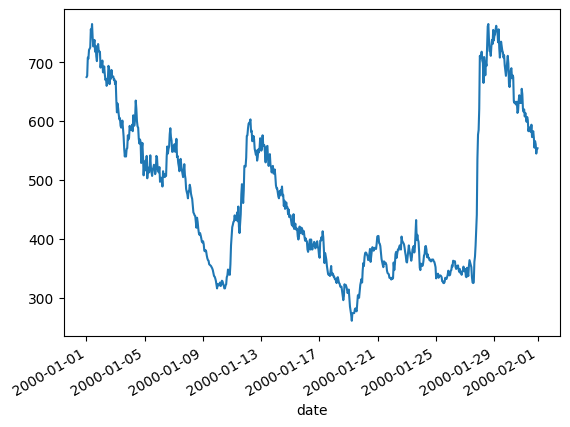

In [295]:
data['Ur'].plot();

In [296]:
data2 = df.resample('M').mean()

In [297]:
# if  data saturates remove them

#df = df[(df['T[K]'] == 10000000.0) & (df['Np'] == 999.9) & (df['Ur'] == 9999.0)]

In [298]:
#df

In [299]:
#df = df[(df['B'] >= 15) | (df['T[K]'] > 10000)]

In [300]:
df.loc['2001-11-04':'2001-11-05'].resample('H').mean()

,B,T[K],Np,Ur
date,,,,
2001-11-04 00:00:00+00:00,6.4,10000000.0,999.9,318.0
2001-11-04 01:00:00+00:00,6.0,10000000.0,999.9,318.0
2001-11-04 02:00:00+00:00,7.0,10000000.0,999.9,302.0
2001-11-04 03:00:00+00:00,7.1,10000000.0,999.9,291.0
2001-11-04 04:00:00+00:00,7.0,10000000.0,999.9,287.0
2001-11-04 05:00:00+00:00,7.6,10000000.0,999.9,309.0
2001-11-04 06:00:00+00:00,8.2,10000000.0,999.9,304.0
2001-11-04 07:00:00+00:00,8.2,10000000.0,999.9,313.0
2001-11-04 08:00:00+00:00,7.2,10000000.0,999.9,320.0


In [301]:
df.loc['2001-11-03':'2001-11-03'].resample('H').mean()

,B,T[K],Np,Ur
date,,,,
2001-11-03 00:00:00+00:00,4.5,50365.0,8.4,352.0
2001-11-03 01:00:00+00:00,4.1,45989.0,8.4,352.0
2001-11-03 02:00:00+00:00,3.6,42438.0,9.1,347.0
2001-11-03 03:00:00+00:00,4.6,43044.0,8.2,341.0
2001-11-03 04:00:00+00:00,4.6,46375.0,7.0,336.0
2001-11-03 05:00:00+00:00,5.4,36981.0,6.2,328.0
2001-11-03 06:00:00+00:00,5.6,10000000.0,999.9,328.0
2001-11-03 07:00:00+00:00,5.7,10000000.0,999.9,323.0
2001-11-03 08:00:00+00:00,5.7,10000000.0,999.9,314.0


In [94]:
# identifying cmes

In [59]:
cmes = data2[(data2['T[K]'] >= 10000000.0) & (data2['Np'] == 999.9) & (data2['Ur'] >= 9999.0)]

In [60]:
cmes

,B,T[K],Np,Ur
date,,,,
2000-11-30 00:00:00+00:00,4.443478,10000000.0,999.9,1159.695652
2001-11-30 00:00:00+00:00,10.716364,10000000.0,999.9,1984.709091


In [67]:
##Fast solar Wind
FW = data2[(data2['Ur'] > 450) & (data2['Ur'] < 1000)]

In [68]:
FW

,B,T[K],Np,Ur
date,,,,


In [410]:
df.loc['2000-11':'2000-11'];

In [74]:
max(df['B'])

62.0

In [351]:
## Read the sunspot data

In [352]:
sn = pd.read_csv('Data_collection/Data/sunspot.csv', skiprows=None, header=None)

In [411]:
sn;

In [354]:
sn.columns = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n']

In [355]:
sn

,a,b,c,d,e,f,g,h,i,j,k,l,m,n
0,1992,1,1,1992.001,186,0,186,14.3,1.0,14.3,19,-1,-1,1
1,1992,1,2,1992.004,190,18,172,8.2,2.6,7.8,21,-1,-1,1
2,1992,1,3,1992.007,234,26,208,18.3,6.1,17.2,21,-1,-1,1
3,1992,1,4,1992.010,243,54,189,14.8,7.0,13.0,20,-1,-1,1
4,1992,1,5,1992.012,242,58,184,13.8,6.8,12.0,18,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11591,2023,9,26,2023.736,140,71,69,17.2,9.5,6.5,42,35,35,0
11592,2023,9,27,2023.738,131,64,67,18.3,8.1,12.5,36,28,28,0
11593,2023,9,28,2023.741,113,59,54,9.4,5.5,6.2,36,29,29,0
11594,2023,9,29,2023.744,102,54,48,9.0,7.2,5.6,31,26,26,0


In [363]:
## Create a function to convert the datetime to gregorian_date

In [376]:
Date = []
for i,j,k in zip(sn['a'],sn['b'],sn['c']):
    date = datetime(i,j,k)
    gregorian_date = date.strftime('%Y-%m-%d %H:%M:%S')
    Date.append(gregorian_date)

In [377]:
sn['Date']=Date

In [379]:
##Convert the date column to a datetime data type
sn['date'] = pd.to_datetime(sn['Date'])

In [382]:
sn.index = sn['date']

In [387]:
SN = sn.loc['2000':'2002', 'e':'g']

In [388]:
SN.columns = ['tot','north', 'south']

<Axes: xlabel='date'>

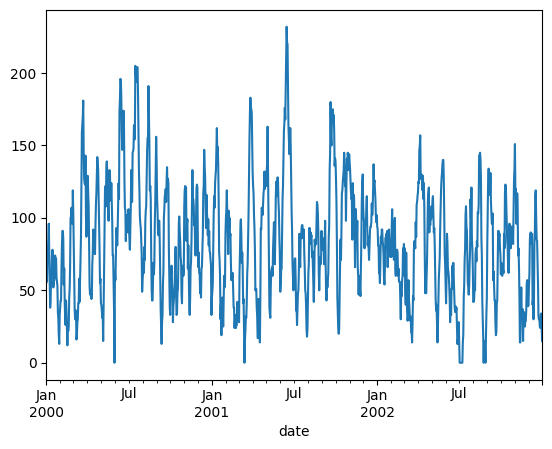

In [397]:
SN['north'].plot()

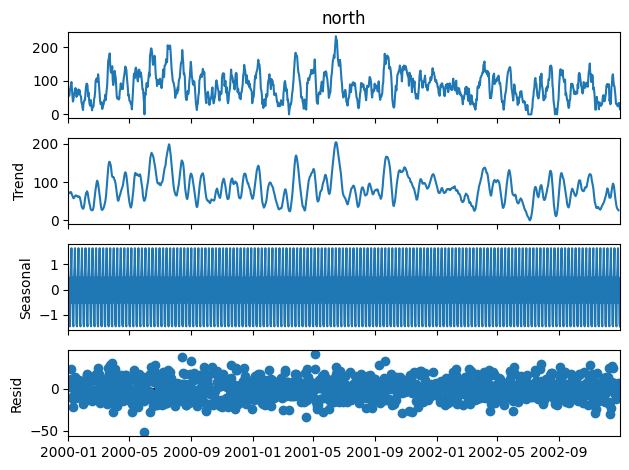

In [405]:
# Decompose time series into trend, seasonal, and residual components.
decomp = seasonal_decompose(SN['north'])

# Plot the decomposed time series.
decomp.plot();

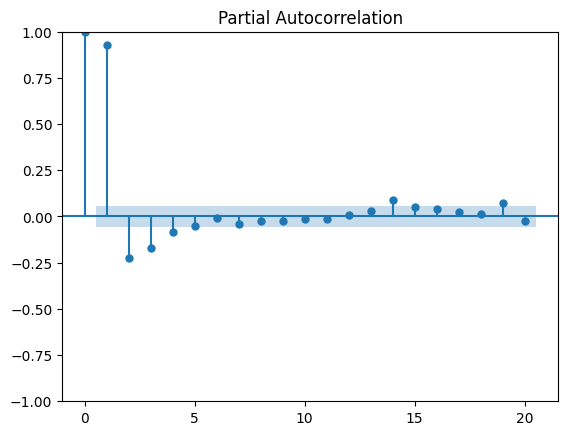

In [406]:
plot_pacf(SN['north'],lags=20);

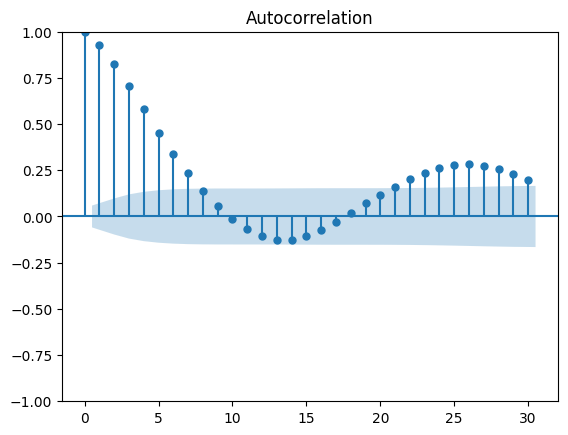

In [407]:
# Generate an ACF plot of the airline passengers data with 30 time periods.
plot_acf(SN['north'],lags=30);

In [401]:
OMNI.corr()

,B,T[K],Np,Ur
B,1.000000,-0.096801,-0.097746,0.308448
T[K],-0.096801,1.000000,0.999476,-0.048880
Np,-0.097746,0.999476,1.000000,-0.055032
Ur,0.308448,-0.048880,-0.055032,1.000000


In [392]:
OMNI =df.resample('D').mean()

'1992-01-01 00:00:00'

In [344]:
sn.index = sn['a']

In [347]:
selected_data = sn.loc['2000':'2002', 'e':'g']

In [349]:
selected_data.columns = ['Tot', 'North' , 'South']

In [350]:
selected_data[]

,Tot,North,South
a,,,
2000,71,55,16
2000,75,57,18
2000,80,56,24
2000,95,74,21
2000,108,77,31
...,...,...,...
2002,49,24,25
2002,45,33,12
2002,52,34,18
